In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


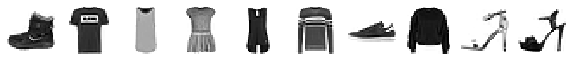

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()
# imshow 플로팅이 이미지로 되어있으면..  cmap 칼라맵 > 흑백을 회색으로 반전시킴

In [3]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [4]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


SGD분류기가 2차원을 다루지 못함 -> 1차원으로 바꿈


In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

train_scaled = train_input / 255.0 
# 스케일링  # 이미지 표준화 -> 색상값(255)으로 나눔 -> (0,1)로 정규화 함.

train_scaled = train_scaled.reshape(-1, 28*28)
# 첫번째 데이터는 무시(-1)하고,
# 두번째 데이터(가로길이)와 세번째 데이터(세로길이)를 곱해서 하나의 차원으로 만듦

print(train_scaled.shape)   # 784 픽셀값


sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
# 로지스틱 손실함수  # max_iter : 반복 epoch

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)  # 교차검증 (기본5개)
print(np.mean(scores['test_score']))     # n_jobs=-1 모든 프로세서를 사용하는 것을 의미

(60000, 784)
0.8192833333333333


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [6]:
sc2 = SGDClassifier(loss='log', max_iter=9, random_state=20)
scores2 = cross_validate(sc2, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores2['test_score']))

0.83605


각 픽셀(784개)에 가중치가 곱해짐
10개의 샘플마다 방정식이 만들어짐

로지스틱에선 손실함수로 시그모이드 사용

딥러닝(=인공신경망)
층(입력층, 출력층 등)으로 구성 되어있음
인공신경망(뉴런) 대신 unit 표현 사용하기도 함

텐서플로, 파이토치(pytorch)로 딥러닝함
텐서플로 2.0버전 이후부터 케라스가 텐서플로 안에 들어감

입력층(I) - 은닉층(H) - 출력층(O)
　　　　　　　　　└─────────┘
　　　　　　　　 　　 두 개의 층으로 된 인공신경망

In [7]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)      # 검증세트

# 딥러닝 부분
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))  
# 층이 가진 역할, 속성  # dense : 밀집층
# 하나의 층만 가진 인공신경망

model = keras.Sequential(dense)

(48000, 784) (48000,)
(12000, 784) (12000,)


일반적으로 케라스가 제공하는 것 -> 유틸리티 층
(케라스 레이어에는 유틸리티를 처리하는 층이 많음)

##### Dense, Sequential 클래스 알아야함

`model = keras.Sequential(dense)`  
신경망 모델  
Sequential - 레이어 층을 차곡차곡 쌓아놓는다는 의미  
dense라는 층을 케라스를 이용하여 쌓아놔라


`dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))`  
10개의 레이블(이미지 클래스)마다 6천장의 이미지를 가짐  
출력으로 10개가 나옴

활성화함수(activation) - softmax 사용  
시그모이드는 (0,1)로 나눔 => 큰 값은 손실됨

input_shape 입력되는 샘플의 크기  

dense : 밀집층, 완전연결층

모델을 만들고 fit하여 교육시켰었음

##### 케라스 모델을 만들고 모델설정을 해야함  
model.compile 모델에 설정값을 담을 때 사용  
파라메터 -> loss(손실함수), metrics(계산.측정할 때 사용할 것)

##### sparse  
라벨이 원핫인코딩 되어있음  # 범주형 데이터를 정규화 하려면 원핫인코딩 해야함  
원핫인코딩 되어있는것을 찾으려면 sparse를 사용해야함  
라벨링이 0~9 처럼 되어있으면 sparse 뺌

In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


교차검증 오래걸려서 안하고
검증세트를 미리 준비해둠

In [9]:
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.6043 - accuracy: 0.7955
Epoch 2/5
48000/48000 [==============================] - 2s 33us/sample - loss: 0.4768 - accuracy: 0.8401
Epoch 3/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4547 - accuracy: 0.8493
Epoch 4/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4458 - accuracy: 0.8530
Epoch 5/5
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4360 - accuracy: 0.8553


In [10]:
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4411189023454984, 0.85408336]

### MNIST
- 28 x 28 사이즈의 손글씨 데이터셋
- 0~9 사이의 숫자가 각 클래스로 가지고 있다
- 색상채널이 없는 흑백 이미지

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

In [12]:
# 1. 데이터 로딩
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
# 2. 데이터셋 확인
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (60000, 28, 28)
y_train.shape :  (60000,)
X_test.shape :  (10000, 28, 28)
y_test.shape :  (10000,)


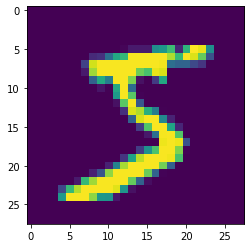

In [14]:
plt.imshow(X_train[0])
plt.show()

In [15]:
input_shape = X_train.shape[1] * X_train.shape[2]
# 클래스의 종류 : 10개(0~9)
classes = len(set(y_train))

print(input_shape, classes)

784 10


In [16]:
# 3차원 => 2차원
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, input_shape)
X_test = X_test.reshape(-1, input_shape)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [17]:
# 원핫인코딩 : classes
y_train = to_categorical(y_train, classes)  # classes 라벨링 개수
y_test = to_categorical(y_test, classes)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [19]:
dense = Dense(10, activation='softmax', input_shape=(784,))  # 튜플타입

In [20]:
model = Sequential(dense)

In [21]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['acc']) # acc = accuracy

In [25]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4353 - acc: 0.8849
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3031 - acc: 0.9154
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2894 - acc: 0.9212
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2847 - acc: 0.9229
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2814 - acc: 0.9248


In [ ]:
# model.evaluate(val_scaled, val_target)